# k-means


Предварительно   устнановим библиотеку для нахождения перелома на графике иетодом локтя (чтобы определить оптимальное количество кластеров)

In [16]:
!pip install kneed

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
import numpy as np

In [18]:
# Загрузка датасета iris
data = sns.load_dataset('iris')
print(data)
print()
X = data.iloc[:, :4]  # Используем только числовые признаки (sepal_length, sepal_width, petal_length, petal_width)
print(X)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0 

Определим на сколько кластеров оптимально делить данные

In [19]:
# Вычисление суммы квадратов расстояний (SSE) для разных значений i

sp_of_sum_of_squares =[]
#вычислим суммы квадратов для каждого кол-ва кластеров с 1 по 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i ,random_state=42) #Параметр random_state=42 используется для контроля случайности(могло быть и др число)
    kmeans.fit(X)
    sp_of_sum_of_squares.append(kmeans.inertia_) # inertia_ - сумма квадратов расстояний до центроидов
# Использование KneeLocator для поиска точки излома
knee_locator = KneeLocator(x=list(range(1,11)), y=sp_of_sum_of_squares, direction='decreasing', curve='convex')
optimal_q_of_clusters = knee_locator.elbow
print(f"Оптимальное количество кластеров: {optimal_q_of_clusters}")


Оптимальное количество кластеров: 3


Визуализируем результат

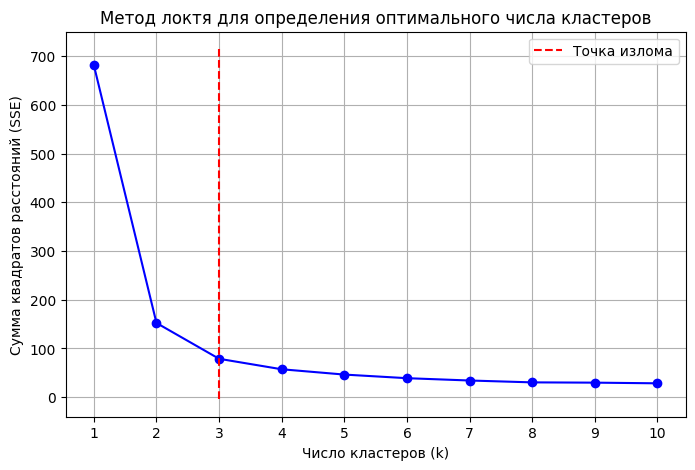

In [20]:
plt.figure(figsize=(8, 5)) #создали фигуру
plt.plot(list(range(1,11)), sp_of_sum_of_squares, 'bo-') # bo- <=> линия с метками
# создадим линию для визуализации нужного числа кластеров
plt.vlines(x=optimal_q_of_clusters, ymin= plt.ylim()[0], ymax= plt.ylim()[1], colors='red', linestyles='--',label='Точка излома') # ymin= plt.ylim()[0], ymax= plt.ylim()[1] <=> максимальное и минимальное значение y на графике в целом
plt.xticks(range(1,11)) # чтобы по оси x были все значения рассматриваемых кластеров
plt.xlabel('Число кластеров (k)')
plt.ylabel('Сумма квадратов расстояний (SSE)')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.legend()
plt.grid(True)
plt.show()

Теперь проведем кластерный анализ методом k-means с 3 класерами

In [21]:
kmeans = KMeans(n_clusters=optimal_q_of_clusters, random_state=42) # задали параметры
kmeans.fit(X) #обучили модель
data['cluster'] = kmeans.labels_ #добавим наши кластеров метки в датафрейм
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species  cluster
0             5.1          3.5           1.4          0.2     setosa        1
1             4.9          3.0           1.4          0.2     setosa        1
2             4.7          3.2           1.3          0.2     setosa        1
3             4.6          3.1           1.5          0.2     setosa        1
4             5.0          3.6           1.4          0.2     setosa        1
..            ...          ...           ...          ...        ...      ...
145           6.7          3.0           5.2          2.3  virginica        0
146           6.3          2.5           5.0          1.9  virginica        2
147           6.5          3.0           5.2          2.0  virginica        0
148           6.2          3.4           5.4          2.3  virginica        0
149           5.9          3.0           5.1          1.8  virginica        2

[150 rows x 6 columns]


Посмотрим насколько хорошо получилось разделить данные, приняв за истинное научное разделение видов растений

In [22]:
# создадим функцию для преобразования меток кластеров (числа в конкретный вид)
def transf(array: np.array):
    new =[]
    for i in array:
        if i == 1:
            new.append('setosa')
        elif i == 0:
            new.append('virginica')
        else:
            new.append('versicolor')
    return new

data['cluster'] = transf(data['cluster'])

data['for_count'] = data['species'] == data['cluster']

print(data['for_count'].sum()) # правильно отнесенных к нужному кластеру данных
print(f"Процент правильно размеченных данных: {round((133/150) * 100, 1)} %")

133
Процент правильно размеченных данных: 88.7 %


Но важно понимать, что "правильно" - это условность, ведь разделение на виды проходило не только на основе количественных метрик в датасете, а на основе многих других научных показателей. Здесь же все основано лишь на математических вычислениях

Визуализируем результаты нашего кластерного анализа в 3D

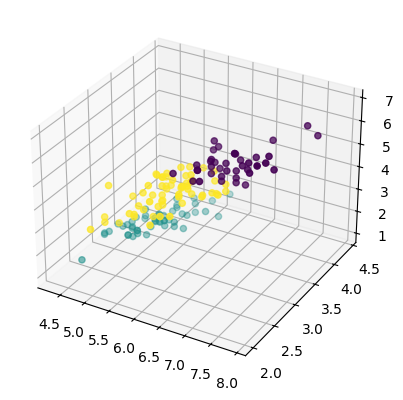

In [23]:
fig =plt.figure()
x = data['sepal_length']
y = data['sepal_width']
z = data['petal_length']
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, c=kmeans.labels_)
plt.show()


 +в  программе можно прокрутить оси и выбрать любой удобный ракурс

# Иерархическая кластеризация

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

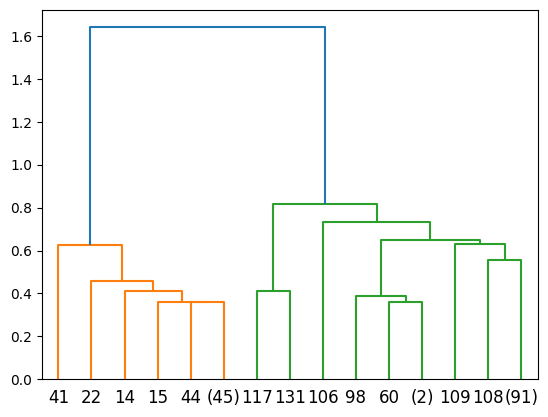

In [25]:
# получим матрицу взаимосвязей для визуализации дендограммы
matrix_of_connections = linkage(y=X, method='single', metric='euclidean') # сначала передали наблюдения ( могли в любой размерности)
                                                                          # затем выбрали метод одиночной связи/наиближайшего соседа
                                                                          # и что считаем евклидово расстояние (по ум) между точками
dendrogram(Z=matrix_of_connections, truncate_mode='level', p=5) # визуализируем дендограмму с 5 уровнями
plt.show()


In [42]:
model = AgglomerativeClustering(n_clusters=3, linkage='single') #зададим данные о том что будем искать 3 кластера методом ближайшего соседа
model.fit(X) # обучим модель

data_new = sns.load_dataset('iris')

data_new['cluster'] = transf(model.labels_)
data_new['predict'] = data_new['species'] == data_new['cluster']
print(data_new['predict'].sum()) #  столько получилось идентефицировать правильно
print(f"Процент правильно размеченных данных: {round((66/150) * 100, 1)} %")


98
Процент правильно размеченных данных: 44.0 %


Замтим, что точность метода k-means намного выше в данном случае